# 1 饼图

pie chart用于展示各部分与整体的比例关系，形状类似一个圆形，被分成若干扇形区域，每个区域代表整体中某一部分的比例，优势在于直观地展示不同部分所占比例或百分比，使得观察者能够一眼看出各部分的大小对比

使用场景：

- 展示比例：各部分占整体比例，市场份额，人口分布
- 比较不同部分：不同类别的大小，不同产品销售占比
- 简化数据：数据集较为简单，分类不多时，可以清晰展示数据

## 1.1 plt.pie

不会自己汇总数据，需要先汇总

参数

- x：表示饼图中每个扇区的数值，通常是数值序列
- labels:标签，通常是与x数量相同的序列
- colors:指定每个扇区的颜色
- autopct:显示数值/百分比样式
- startangle：控制绘图放入的起始角度
- explode：用于突出显示某一部分，可以传入一个与x等长的列表，指定某部分突出长度
- shadow：是否添加阴影
- hatch：设置填充图案
- wedgeprops：设置环形饼图
- textprops：设置显示字体属性
- plt.legend：设置图例

## 1.1 实例

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [14]:
# 创建日期范围
dates = pd.date_range('20230101',periods=7)

# 创建数据集

date = {
    'Date': dates,
    'Products_A':np.random.randint(1,10,len(dates)),
    'Products_B':np.random.randint(1,10,len(dates)),
    'Products_C':np.random.randint(1,10,len(dates)),
    'Region':np.random.choice(['a','b','c','d'],len(dates)),
}

df = pd.DataFrame(date)
df

df_a_sum = df.groupby('Region')['Products_A'].mean()
df_a_sum# Series
df_a_sum = df_a_sum.reset_index(drop=False,inplace=False)
df_a_sum

,Region,Products_A
0,a,5.000000
1,b,2.000000
2,c,5.333333
3,d,6.000000


### 1.2.1 基本饼图


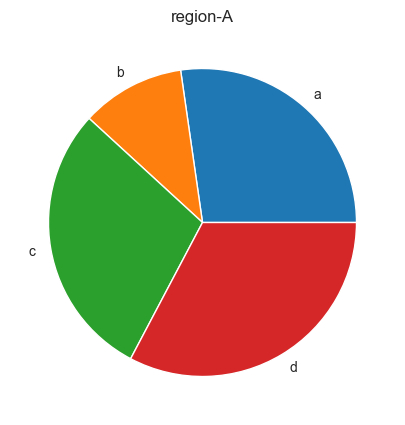

In [15]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'])

plt.title('region-A')
plt.show()


### 1.2.2 color颜色参数

#### 1.2.2.1 常见颜色调色板palette介绍

colors=sns.color_palette("Set2")

**Qualitative Palettes**：适合离散的类别数据，颜色彼此之间没有顺序或关联

- deep:默认，适合大部分情况
- muted:颜色较柔和，适合多类别对比
- pastel:颜色柔和
- dark:深沉的颜色，适合整数图表
- -colorblind：色盲友好，适合视觉障碍用户
- Set1，Set2，Set3，适合多个类别的颜色分配
- Paired：适合两两配对的颜色
- Accent：色调较鲜艳，适合强调特定类别


Sequential Paiettes：适合连续数据的颜色映射，从浅到深表示从大到小

![Sequential](../picture/B-pieplot-1.png)

![Sequential](../picture/B-pieplot-2.png)

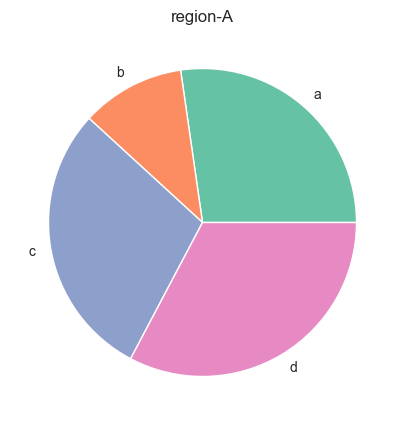

In [17]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"))

plt.title('region-A')
plt.show()

### 1.2.3 autopct显示数值和百分比

- 仅显示百分比

autopct = %%代表百分比,.nf表示小数位数，显示在内部

- 显示原始数值与百分比

定义函数，显示原始数值和百分比

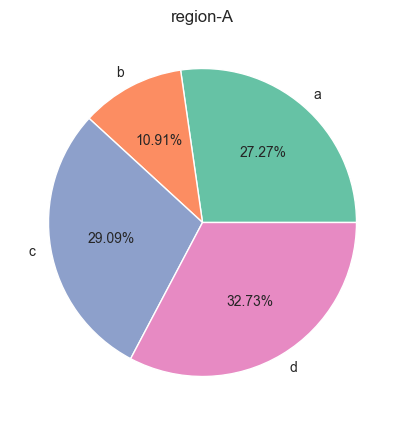

In [18]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),autopct='%.2f%%')

plt.title('region-A')
plt.show()

In [21]:
# 定义函数，显示原始数值和百分比

def display_values(pct,allvals):
    # pct表示百分比占比
    absolute = round(pct / 100. * sum(allvals), 0)# 计算原始数值
    return f'{absolute:.0f} ({pct:.2f}%)'

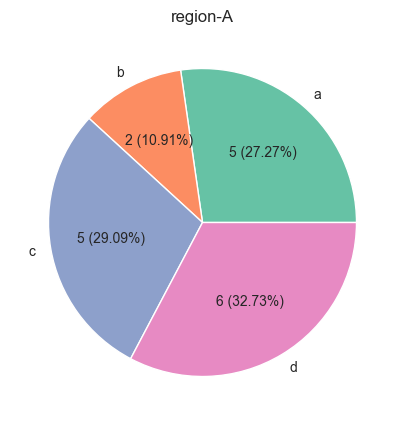

In [22]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']))

plt.title('region-A')
plt.show()

### 1.2.3 startangle控制起始角度

默认从三角函数的x轴正方向开始画，加入角度可以改变

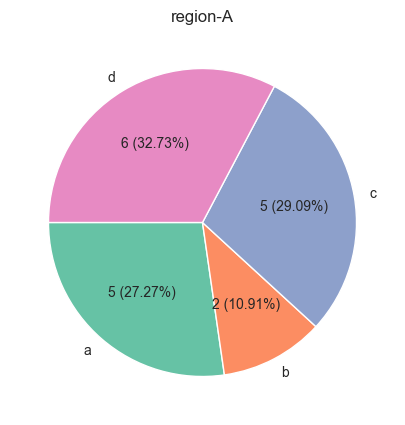

In [23]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180)

plt.title('region-A')
plt.show()

### 1.2.5 explode突出显示某部分

传入和label长度一样的小数列表，数字大小表示突出程度,值愈大越明显，0.1就很明显了

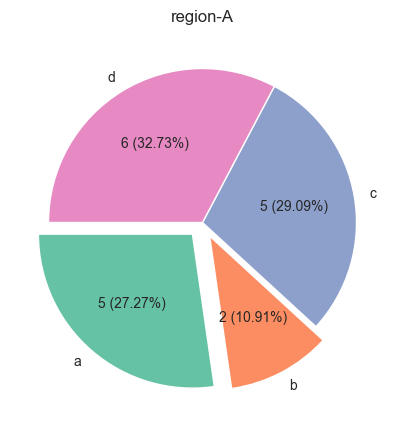

In [24]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        explode=[0.1,0.1,0,0])

plt.title('region-A')
plt.show()

### 1.2.6 shadow设置阴影效果


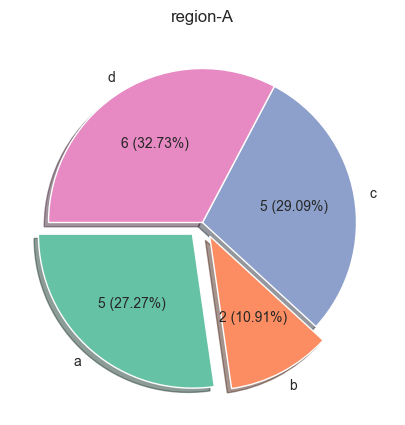

In [25]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        shadow=True,
        explode=[0.1,0.1,0,0])

plt.title('region-A')
plt.show()

### 1.2.7 hatch设置填充图案

给一个与长度一致的列表，为不同类别填充不同图案

- /:斜线填充
- \\:反斜线填充
- |:竖直线
- -:水平线
- +:十字
- .:点

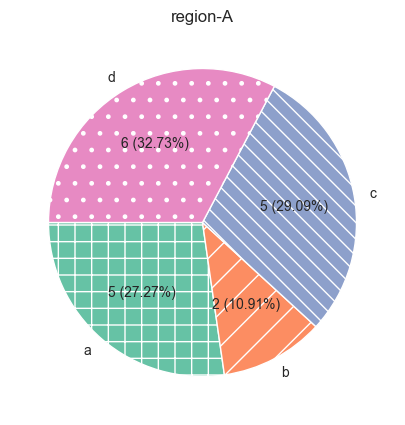

In [27]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        hatch=['+','/','\\\\','.'])

plt.title('region-A')
plt.show()

### 1.2.8 wedgeprops+width设置环形饼图

width控制环的大小,1 - 内圆/外圆的值,越大，环越大

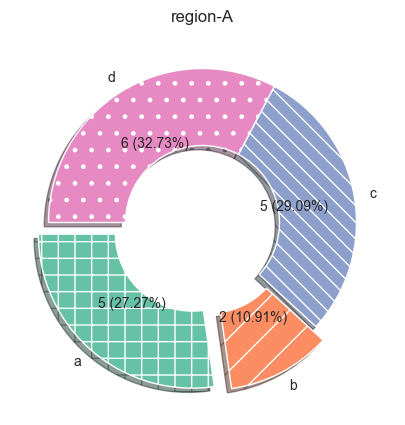

In [29]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        shadow=True,
        explode=[0.1,0.1,0,0],
        hatch=['+','/','\\\\','.'],
        wedgeprops={'width':0.5})

plt.title('region-A')
plt.show()

### 1.2.9 textprops 设置显示字体属性

![Sequential](../picture/B-pieplot-3.png)

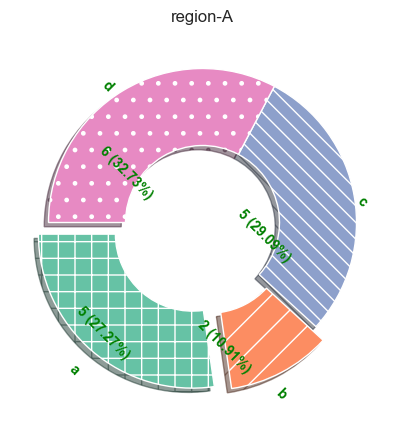

In [31]:
sns.set_style('white')

plt.figure(figsize=(10,5))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set2"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        shadow=True,
        explode=[0.1,0.1,0,0],
        hatch=['+','/','\\\\','.'],
        wedgeprops={'width':0.5},
        textprops={'fontsize':10,
                   'fontweight':'bold',
                   'color':'green',
                   'va':'top',
                   'ha':'right',
                   'rotation':-45})

plt.title('region-A')
plt.show()

### 1.2.10 plt.legend设置图例

![pie](../picture/B-pieplot-4.png)

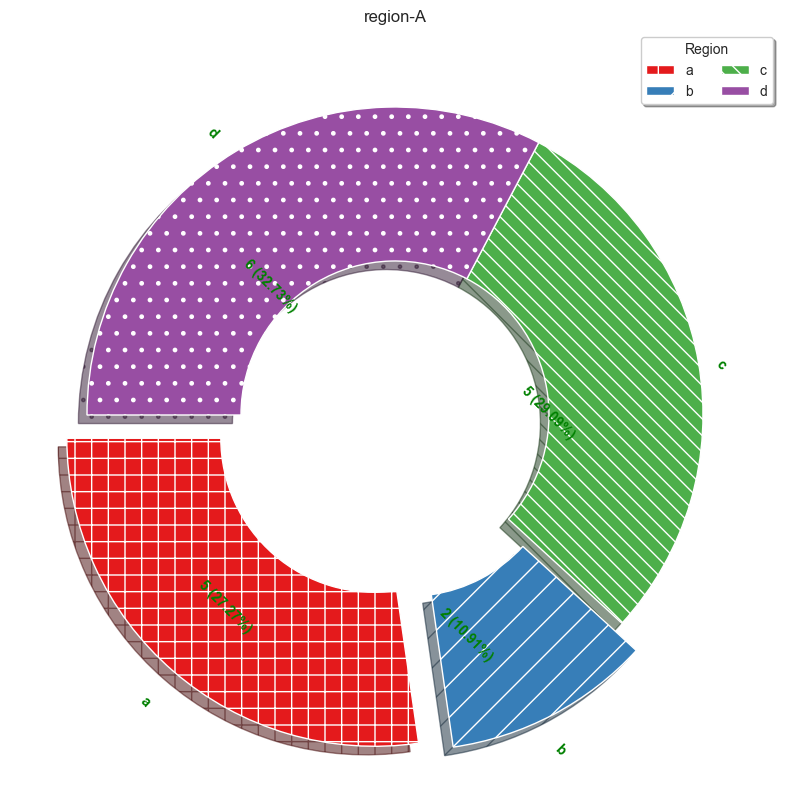

In [36]:
sns.set_style('white')

plt.figure(figsize=(10,10))

plt.pie(x=df_a_sum['Products_A'],labels=df_a_sum['Region'],colors=sns.color_palette("Set1"),
        autopct=lambda pct: display_values(pct,df_a_sum['Products_A']),
        startangle=180,
        shadow=True,
        explode=[0.1,0.1,0,0],
        hatch=['+','/','\\\\','.'],
        wedgeprops={'width':0.5},
        textprops={'fontsize':10,
                   'fontweight':'bold',
                   'color':'green',
                   'va':'top',
                   'ha':'right',
                   'rotation':-45}
        )

plt.title('region-A')

# 添加图例
plt.legend(labels=df_a_sum['Region'],title='Region',loc='upper right',fontsize=10,shadow=True,ncol=2)
#显示
plt.show()